# Correlation 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")
names = data.columns.values
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
len(data)

200

In [4]:
data["cov_TV"] = (data.TV-data.TV.mean())*(data.Sales-data.Sales.mean())
data.head()

,TV,Radio,Newspaper,Sales,cov_TV
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [5]:
data["Var_TV"] = (data.TV-data.TV.mean())**2
data.head()

,TV,Radio,Newspaper,Sales,cov_TV,Var_TV
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [6]:
data["Var_Sales"] = (data.Sales-data.Sales.mean())**2
data.head()

,TV,Radio,Newspaper,Sales,cov_TV,Var_TV,Var_Sales
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


$$\text{Coeficiente de Correlación de pearson}$$

$$\rho_{X,Y} = \frac{\sigma_{X,Y}}{\sigma_x \sigma_y}=\frac{\sum_{i=1}^n E[(X_i-\mu_x)(Y_i-\mu_y)]}{\sqrt{\sum_{i=1}^n (X_i- \mu_x)^2}{\sqrt{\sum_{i=1}^n (Y_i - \mu_y)^2}} }=\frac{\sum_{i=1}^n E[(X_i-\mu_x) (Y_i-\mu_y)]}{\sigma_x\cdot \sigma_y}$$

In [7]:
corr = sum(data.cov_TV)/np.sqrt((sum(data.Var_TV)*sum(data.Var_Sales))) 

In [8]:
corr

0.782224424861606

In [9]:
def corr_pearson(data,col1,col2):
    data["cov_" + str(col1)+"_"+str(col2)] = (data[col1]-data[col1].mean())*(data[col2]-data[col2].mean())
    data["Var_" + str(col1)] = (data[col1]-data[col1].mean())**2
    data["Var_" + str(col2)] = (data[col2]-data[col2].mean())**2
    corr = corr = sum(data["cov_" + str(col1)+"_"+str(col2)])/np.sqrt((sum( data["Var_" + str(col1)])*sum( data["Var_" + str(col2)])))
    return corr

In [10]:
corr_pearson(data,"TV", "Sales")

0.782224424861606

In [11]:
corr_pearson(data,"Radio", "Sales")

0.5762225745710553

In [12]:
corr_pearson(data,"Newspaper", "Sales")

0.22829902637616525

In [13]:
data = pd.read_csv("../datasets/ads/Advertising.csv")
data1 = data.copy()
for k in names:
    for l in names:
        corr= corr_pearson(data,k, l)
        print("La correlación entre {} y {} es  {}: ".format(k,l,corr))
    data = data1.copy()

La correlación entre TV y TV es  1.0: 
La correlación entre TV y Radio es  0.05480866446583009: 
La correlación entre TV y Newspaper es  0.056647874965056993: 
La correlación entre TV y Sales es  0.782224424861606: 
La correlación entre Radio y TV es  0.05480866446583009: 
La correlación entre Radio y Radio es  1.0: 
La correlación entre Radio y Newspaper es  0.3541037507611752: 
La correlación entre Radio y Sales es  0.5762225745710553: 
La correlación entre Newspaper y TV es  0.056647874965056993: 
La correlación entre Newspaper y Radio es  0.3541037507611752: 
La correlación entre Newspaper y Newspaper es  1.0: 
La correlación entre Newspaper y Sales es  0.22829902637616525: 
La correlación entre Sales y TV es  0.782224424861606: 
La correlación entre Sales y Radio es  0.5762225745710553: 
La correlación entre Sales y Newspaper es  0.22829902637616525: 
La correlación entre Sales y Sales es  1.0: 


In [14]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


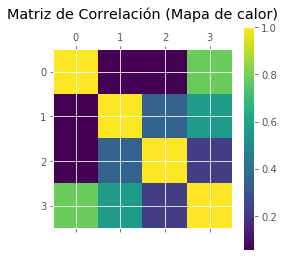

In [15]:
plt.matshow(data1.corr())
plt.title("Matriz de Correlación (Mapa de calor)\n")
plt.colorbar()
plt.show()

In [16]:
# Covarianza
data["cov_TV"] = (data.TV-data.TV.mean())*(data.Sales-data.Sales.mean())
data["cov_Radio"] = (data.Radio-data.Radio.mean())*(data.Sales-data.Sales.mean())
np.mean(data.cov_TV),np.mean(data.cov_Radio)

(348.6382437499999, 44.41250999999999)

In [17]:
data.cov()

,TV,Radio,Newspaper,Sales,cov_TV,cov_Radio
TV,7370.949893,69.862492,105.919452,350.390195,-4927.823670,2187.260832
Radio,69.862492,220.427743,114.496979,44.635688,2187.260832,79.228960
Newspaper,105.919452,114.496979,474.308326,25.941392,1198.326120,67.677229
Sales,350.390195,44.635688,25.941392,27.221853,221.854214,203.440103
cov_TV,-4927.823670,2187.260832,1198.326120,221.854214,195566.691987,11345.906736
cov_Radio,2187.260832,79.228960,67.677229,203.440103,11345.906736,6200.185382


In [18]:
var= (sum((data.Sales-data.Sales.mean())**2))/(len(data)-1);std = np.sqrt(var); var, std

(27.221853015075364, 5.217456565710477)

In [19]:
print(data.Sales.var()); data.Sales.std()

27.221853015075364


5.217456565710477

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
X = data.TV.values.reshape(-1,1)
Y = data.Sales .values.reshape(-1,1)
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lm.coef_,lm.intercept_

(array([[0.04753664]]), array([7.03259355]))

In [23]:
predict = lm.predict(X)

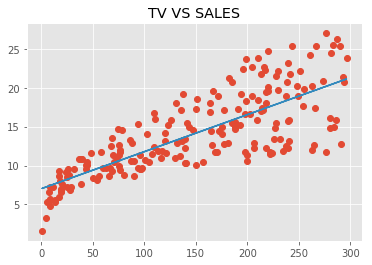

In [24]:
plt.plot(data.TV,data.Sales,"o")
plt.plot(X,predict)
plt.title("TV VS SALES")
plt.show()

$$MSE = \frac{\sum_{i=1}^n (y_i-\tilde{y})^2}{n}$$

In [25]:
mean_squared_error(Y, predict), str(r2_score(Y, predict)*100)+"%"

(10.512652915656757, '61.187505085007096%')

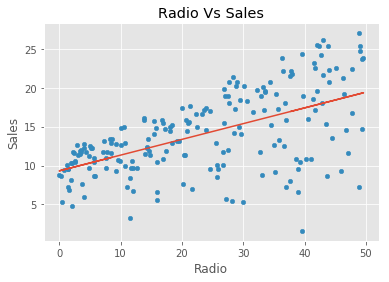

In [26]:
X= data.Radio.values.reshape(-1,1)
Y=data.Sales.values.reshape(-1,1)
lm1 = LinearRegression()
lm1.fit(X,Y)
prediction = lm1.predict(X)
data.plot(kind="scatter",x="Radio",y="Sales")
plt.plot(X,prediction)
plt.title("Radio Vs Sales")
plt.show()

In [27]:
mean_squared_error(Y, prediction), r2_score(Y,prediction)

(18.09239774512544, 0.33203245544529525)

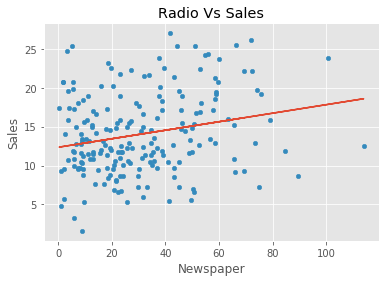

In [28]:
X= data.Newspaper.values.reshape(-1,1)
Y=data.Sales.values.reshape(-1,1)
lm2 = LinearRegression()
lm2.fit(X,Y)
prediction = lm2.predict(X)
data.plot(kind="scatter",x="Newspaper",y="Sales")
plt.plot(X,prediction)
plt.title("Radio Vs Sales")
plt.show()

In [29]:
mean_squared_error(Y, prediction), r2_score(Y,prediction)

(25.674022720559698, 0.05212044544430516)